<a href="https://colab.research.google.com/github/ColeTKrause/MAT421/blob/main/ModuleB_P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Interpolation

## Problem Statement
### Section 17.1

Industry professionals often rely on Regression methods when trying to predict the outcome for a random variable based on an underlying data set. However, anlyst and professionals are not always trying to predict future values. They often times need to "fill in the gaps" for a given data set they currently have. A regression equation could be appropriate when the underlying data is considered unreliable. Regression techniques rely on the assumption that the underlying data has errors due to events like restrictions in the accuracy of measurement or human introduced errors. But what technique is appropriate when the underlying data is assumed to be very reliable?

Well this is where Interpolation techniques will provide a better estimate function for the data. Unlike regression techniques, interpolation restricts the function to passing through past and future data values along with the predicted values. This IS NOT a requirement for regression.

Now the one requirement for interpolation is the user must understand the underlying data well enough to know which interpolation technique will produce the best model. In other words, the quality of the model must be inferred by the user. The user must assess if the data is best represented through linear equations or a polynomial equation.

## Linear Interpolation
### Section 17.2

Based on the "Python Numerical Methods" textbook, a linear interpolation will "fill in the gap" for the missing data point by assuming there is a straight line connecting two points to the left and right of the data point. The mathematical method for determining linear interpolation is:
$ŷ(x)=y_i+\frac{(y_{i+1}-y_i)(x-x_i)}{(x_{i+1}-x_i)}$ where ŷ(x) is the function to "fill in the gap" given a data point x.
Important restrictions: $x_i<x_{i+1}$ and $x_i<x<x_{i+1}$

For example:
Lets say a scientist is measuring the weight of a client each week for a month. The scientist doesn't have the weight of a client for a week day, and they want to "fill in the gap". Linear interpolation would be a great approach as the weight is assumed to be an accurate measurement and there will not be large sudden changes over the course of a week. Thus it is reasonable to assume the weight of a client will be on a linear line when comparing the prior measurement to the next measurement. Why? Because the weight of a human male/female does not change rapidly. A weight-loss program ideally follows a steady linear decreases with with the occasional maintenance periods.  

2.5
2.5
Success!


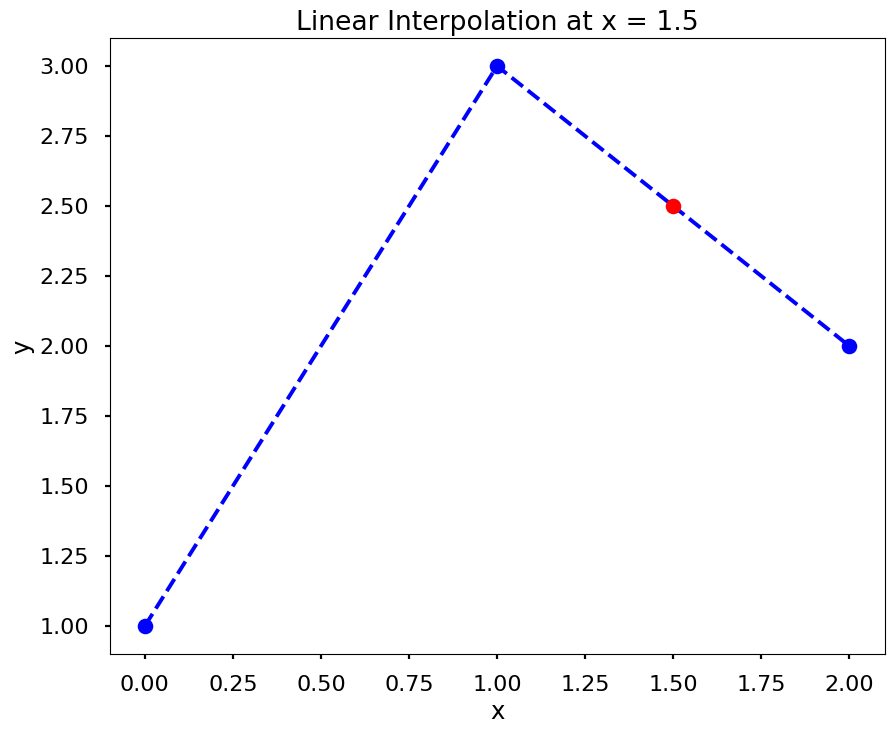

In [ ]:
# Necessary Imports and packages
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# changing plt to 'seaborn-poster' is now deprecated and no longer included as a result

# Book example
x = [0, 1, 2]
y = [1, 3, 2]

f = interp1d(x,y)
y_hat = f(1.5)
print(y_hat)

# manual check
y_hat_manual = 3 + (((2-3)*(1.5-1))/(2-1))

if(y_hat_manual == y_hat):
  print("Success!")

plt.figure(figsize = (10,8))
plt.plot(x, y, 'bo',linestyle='dashed')
plt.plot(1.5, y_hat, 'ro')
plt.title('Linear Interpolation at x = 1.5')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

230.0
234.5


<Figure size 1280x880 with 0 Axes>

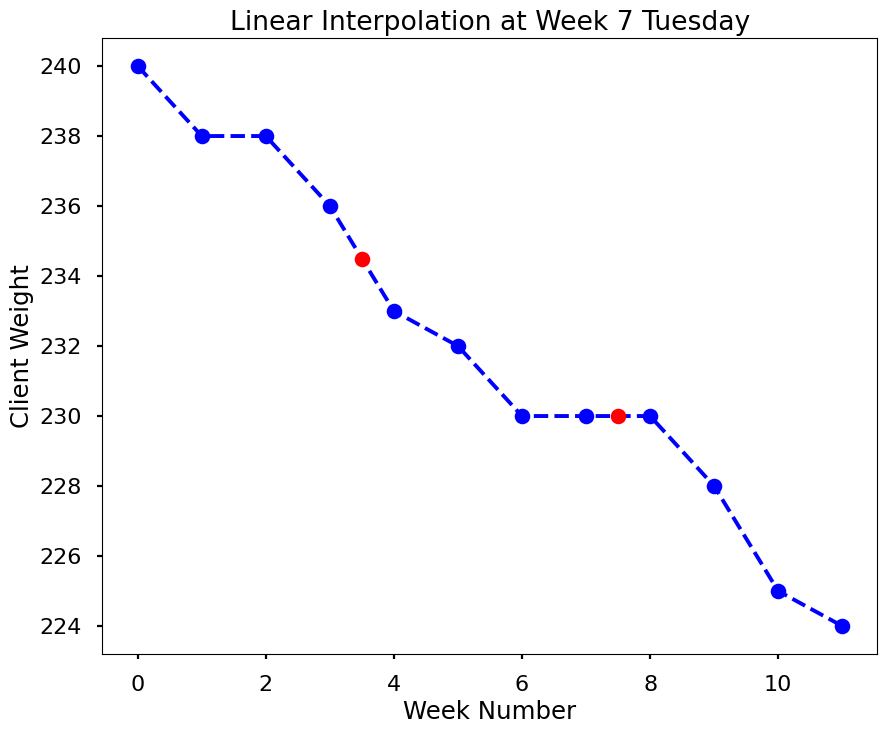

In [ ]:
plt.clf()

# Weight-loss program example
week_num = [0,1,2,3,4,5,6,7,8,9,10,11]   # 4 months - 12 weeks sample
client_weight = [240, 238, 238, 236, 233, 232, 230, 230, 230, 228, 225, 224]    # client weightloss data

weight_func = interp1d(week_num, client_weight)
pred_weight = weight_func(7.5)
pred_weight2 = weight_func(3.5)
print(pred_weight)
print(pred_weight2)

plt.figure(figsize = (10,8))
plt.plot(week_num, client_weight, 'bo',linestyle='dashed')
plt.plot(7.5, pred_weight, 'ro')
plt.plot(3.5, pred_weight2, 'ro')
plt.title('Linear Interpolation at Week 7 Tuesday')
plt.xlabel('Week Number')
plt.ylabel('Client Weight')
plt.show()

## Cubic Spline Interpolation
### Section 17.3

Based on the "Python Numerical Methods" textbook, a cubic spline interpolation will "fill in the gap" for the missing data point by assuming there is a cubic polynomial line connecting two points to the left and right of the missing data point.

The mathematical method for determining linear interpolation is:
$S_i(x)=a_ix^3+b_ix^3+c_ix+d_i$ which is constrained to $x_i\le x \le x_{i+1}$ given $i=1,...,n-1$. The process for determining the interpolation requires the coefficients for $a_i, b_i, c_i, d_i$ resulting in $4(n-1)$ unknown independent equations.

Example using three data points:


<Figure size 1280x880 with 0 Axes>

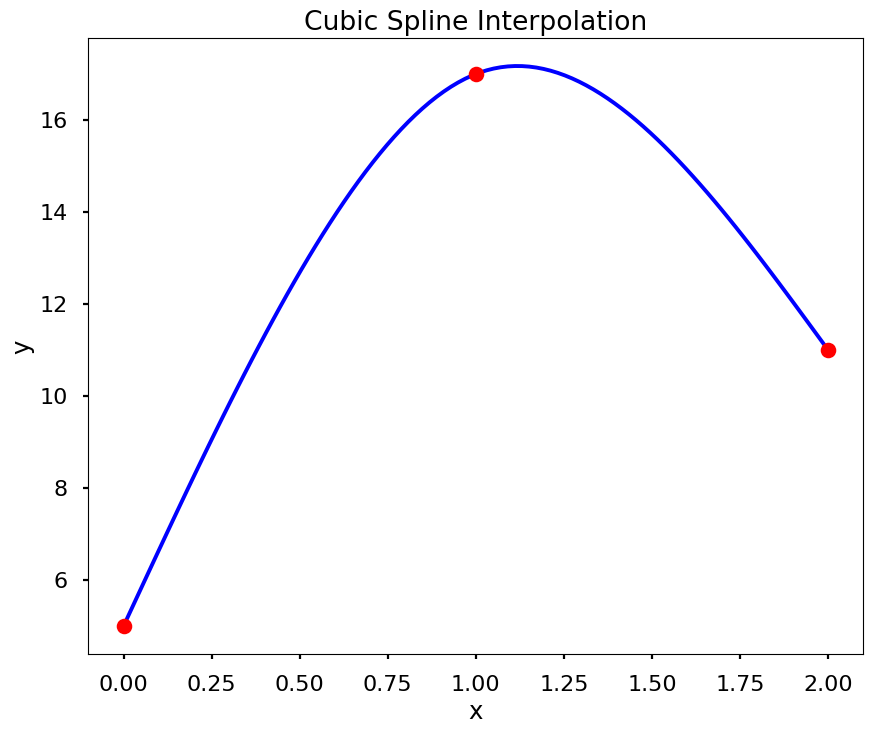

In [27]:
# additional imports
from scipy.interpolate import CubicSpline
import numpy as np

# clear current plot
plt.clf()

# Concave example
x = [0, 1, 2]
y = [5, 17, 11]

cub_f = CubicSpline(x,y, bc_type='natural')
x_new = np.linspace(0, 2, 100)
y_new = cub_f(x_new)
plt.figure(figsize=(10,8))
plt.plot(x_new, y_new, 'b')
plt.plot(x,y,'ro')
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()